# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 11, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

YOUR ANSWER HERE

# About imports
Please import the needed packages by yourself.

# Exercise 1
N.B.1 tentative points for each part are: 2+1.5+2+2+1.5 (and one point for free gives 10).

N.B.2 you are to implement the methods yourself.

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 
## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

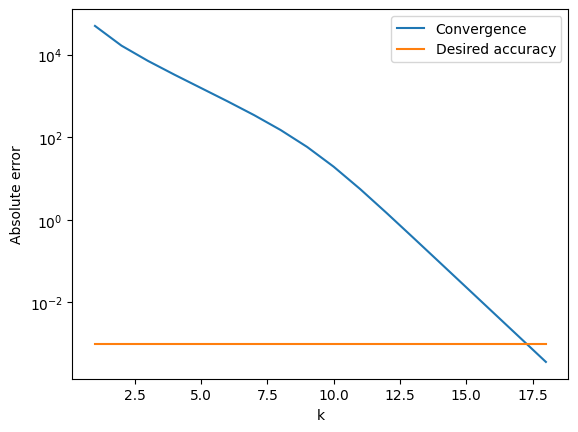

The smallest k for which the error is smaller than epsilon of 0.001 is 18


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x ** (-3)


def F(x):
    return -1 / 2 * x ** (-2)


def T(f, a, b, m):
    x = np.linspace(a, b, m)
    j = np.arange(1, len(x))
    return 0.5 * np.sum((x[j] - x[j - 1]) * (f(x[j - 1]) + f(x[j])))


def investigate_convergence(f, F, a, b, k, epsilon=1e-3):
    errors = []
    error = 1
    i = 0
    analytical = F(b) - F(a)

    while error > epsilon and i < k:
        m = int(2 ** (i + 1))
        approximate = T(f, a, b, m)
        error = np.abs(approximate - analytical)
        errors.append(error)
        i += 1
    
    ks = np.arange(i) + 1
    plt.plot(ks, errors, label='Convergence')
    plt.plot(ks, [epsilon for i in ks], label='Desired accuracy')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('Absolute error')
    plt.legend()
    plt.show()
    
    if i <= k:
        print(f"The smallest k for which the error is smaller than epsilon of {epsilon} is {i}")
    else:
        print(f"For a maximum k of {k}, the desired accuracy is not reached.")

a = 1/10
b = 100
k = 25
investigate_convergence(f, F, a, b, k)

# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 11, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Koen Weverink (14711982) & Jasper Timmer (12854328)

# About imports
Please import the needed packages by yourself.

# Exercise 1
N.B.1 tentative points for each part are: 2+1.5+2+2+1.5 (and one point for free gives 10).

N.B.2 you are to implement the methods yourself.

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 
## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

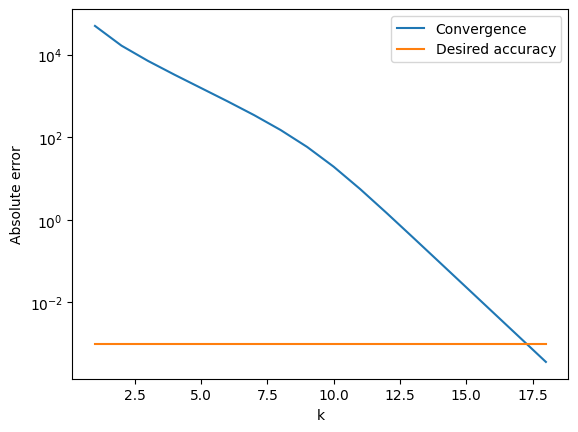

The smallest k for which the error is smaller than epsilon of 0.001 is 18


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x ** (-3)


def F(x):
    return -1 / 2 * x ** (-2)


def T(f, a, b, m):
    x = np.linspace(a, b, m)
    j = np.arange(1, len(x))
    return 0.5 * np.sum((x[j] - x[j - 1]) * (f(x[j - 1]) + f(x[j])))


def investigate_convergence(f, F, a, b, k, epsilon=1e-3):
    errors = []
    error = 1
    i = 0
    analytical = F(b) - F(a)

    while error > epsilon and i < k:
        m = int(2 ** (i + 1))
        approximate = T(f, a, b, m)
        error = np.abs(approximate - analytical)
        errors.append(error)
        i += 1
    
    ks = np.arange(i) + 1
    plt.plot(ks, errors, label='Convergence')
    plt.plot(ks, [epsilon for i in ks], label='Desired accuracy')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('Absolute error')
    plt.legend()
    plt.show()
    
    if i <= k:
        print(f"The smallest k for which the error is smaller than epsilon of {epsilon} is {i}")
    else:
        print(f"For a maximum k of {k}, the desired accuracy is not reached.")
        return k

a = 1/10
b = 100
k = 25
investigate_convergence(f, F, a, b, k)

The inspected function has a singularity at x=0. While this lies outside of the inspected region, this still influences the numerical integration process. The value closest to this singularity is 0.1, which has a corresponding y-value of 1000. This results in the algorithm converging slowly: as the size of each step in the trapezoid method needs to be sufficiently small in order for the first term to be accurate.

## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$\begin{aligned}
I_1(f,a,b) = {}& T(f,a,b,1) \\
I_2(f,a,b) = {}& T(f,a,b,2) .
\end{aligned}$$
Show, based on the error estimates for the trapezoid rule using the Taylor series (book example 8.2) that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).

According to literature, the error estimate for the trapezoidal rule using Taylor series is given by:

$$|E| \leq \frac{|f''(x)|(b-a)^3}{12n^2},$$

where the inequality would be exactly equal for a value for x where $f''(x)$ is maximal.

For $I_1$, $n=1$, so $|E_1|\leq \frac{f''(x)(b-a)^3}{12}$,


and as $n=2$ for $I_2$, $|E_2| \leq \frac{f''(x)(b-a)^3}{48}$

Combining this with:

$E_2 = C (I_1 - I_2)$

leads to

$\frac{M(b-a)^3}{48} = C\left(\frac{M(b-a)^3}{12} - \frac{M(b-a)^3}{48}\right)$


We can cimplify this to:

$\frac{1}{48} = \frac{C}{12} - \frac{C}{48}$

and simplify further to:

$1 = 4C - C$

So, $C=\frac{1}{3}$


## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

In [3]:
def I1(f, a, b):
    return T(f, a, b, 1)

def I2(f, a, b):
    return T(f, a, b, 2)

def adaptive_integration(f, a, b, epsilon):
    result = I2(f, a, b)
    error = (1/3) * abs(I1(f, a, b) - I2(f, a, b))

    if error <= epsilon/2:
        return result
    else:
        mid = (a + b) / 2
        left_integral = adaptive_integration(f, a, mid, epsilon)
        right_integral = adaptive_integration(f, mid, b, epsilon)
        return left_integral + right_integral

# Set the interval [a, b] and tolerance epsilon
a = 1/10
b = 100
epsilon = 1e-3

# Apply the routine to the function x^{-3}
result = adaptive_integration(f, a, b, epsilon)

# Calculate the exact error
exact_error = abs(result - (F(b) - F(a)))
print("Approximation result:", result)
print("Exact error:", exact_error)


Approximation result: 50.00053082999457
Exact error: 0.000580829994575538


## (d)
Modify the code of (c) so that the number of function evaluations is counted and that no unnecessary function evaluations are performed. Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable that is incremented by the function each time it is called.)

In [4]:
function_evaluations = 0

def f(x):
    global function_evaluations
    function_evaluations += 1
    return x ** (-3)

def adaptive_integration(f, a, b, epsilon):
    global function_evaluations
    result = I2(f, a, b)
    error = (1/3) * abs(I1(f, a, b) - I2(f, a, b))

    if error <= epsilon:
        return result
    else:
        function_evaluations -= 2  # Subtract evaluations for I1 and I2 as they have been computed
        mid = (a + b) / 2
        left_integral = adaptive_integration(f, a, mid, epsilon)
        right_integral = adaptive_integration(f, mid, b, epsilon)
        return left_integral + right_integral

# Set the interval [a, b] and tolerance epsilon
a = 1/10
b = 100
epsilon = 1e-3

# Reset function evaluations count
function_evaluations = 0

# Apply the routine to the function x^{-3}
result = adaptive_integration(f, a, b, epsilon)

# Calculate the exact error
exact_error = abs(result - (F(b) - F(a)))
print("Approximation result:", result)
print("Exact error:", exact_error)
print("Function evaluations:", function_evaluations)



Approximation result: 50.001080231040675
Exact error: 0.0011302310406833271
Function evaluations: 234506


In [5]:
old_k = 2 ** 18
print('function_evaluations (c) - k (a) = ', function_evaluations - old_k)

function_evaluations (c) - k (a) =  -27638


As can be seen, the modification the code of (c) without performing unnecessary function evaluations results in 27638 less iterations needed, compared to the result of (a). 


## (e)
In the course of executing the recursive procedure, some subintervals are refined (split in two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Discuss briefly possible alternative approaches.



The efficiency of an adaptive algorithm depends on how well it can adaptively refine the integration process, in order to efficiently allocate computational resources in regions where the function is more challenging or varies rapidly.

Alternative approaches could be:

- Adaptive Step Size Control: Instead of dividing the interval into two equal subintervals, dynamically adjust the size of the subintervals based on the local behavior of the function. (Wanner, G., & Hairer, E. (1996). Solving ordinary differential equations II (Vol. 375). New York: Springer Berlin Heidelberg.)

- Non-Uniform Subinterval Selection: Introduce algorithms to non-uniformly select subintervals based on the function behavior. This could involve dynamically identifying regions where function values change rapidly and refining those regions more aggressively. (Tokat, Sezai. (1998). Non-uniform sampling interval selection for change detection.)

- Global-Local Strategies: Use a global strategy to identify large-scale features of the function and a local strategy to refine subintervals in regions of rapid variation. (R. Horst, H. Tuy, Global Optimization: Deterministic Approaches, Springer, 1996.)